<a href="https://colab.research.google.com/github/sanaomaro/AIM-5001/blob/main/S_Omar_Project3_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM 5001 Project 3 (Module 10)**

**Data Preparation & Feature Engineering**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection


In [ ]:
df = "https://raw.githubusercontent.com/sanaomaro/AIM-5001/main/M10_Data.csv"
df = pd.read_csv(df)
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


We noticed there is no headers, so we add them according to the main website of the dataset: https://archive.ics.uci.edu/ml/datasets/Automobile

In [ ]:
df = "https://raw.githubusercontent.com/sanaomaro/AIM-5001/main/M10_Data.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(df, names = headers)

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df.shape

(205, 26)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
nan_data = df.isnull()
nan_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Checking for any null data

In [ ]:
null_df = df.isnull().any()


In [ ]:
null_df

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

I think we should replace '?' by nan

In [ ]:
df.replace("?", np.nan, inplace = True)

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Inspecting statistics summary and corrolation matrix between features, before any fixing or filling missing data

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


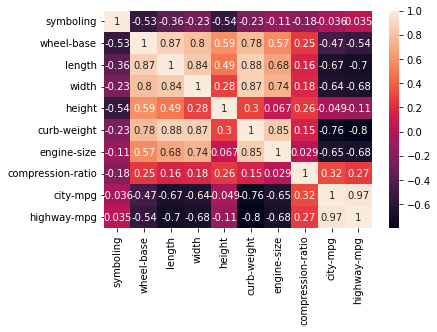

In [ ]:
sns.heatmap(df.corr(), annot=True)

Interestingly, engine size and length are somwhat highly correlated, also curb weight and width, engine size and curb weight.

Looking for missing data count for each column.

In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
null_df = df.isnull().any()
null_df

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [ ]:
null_data = df.isnull()
null_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_data.shape

(205, 26)

we found out that missing data are as the following:

1. "normalized-losses": 41 missing data 
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

While the first one has the most data missing.

All of them are numeric data except the second one.

In [ ]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [ ]:
print(df['bore'].unique())
print(df['stroke'].unique())
print(df['horsepower'].unique())
print(df['peak-rpm'].unique())
print(df['price'].unique())

['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' nan '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
['2.68' '3.47' '3.4' '2.8' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46' '3.9'
 '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' nan '3.16' '3.64' '3.1' '3.35'
 '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.9' '2.07' '2.36'
 '2.64' '3.08' '3.5' '3.54' '2.87']
['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' nan '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']
['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' nan '52

In [ ]:
#lest check the type,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
#print(df['normalized-losses'].value_counts())
print(df['num-of-doors'].value_counts())
#print(df['bore'].value_counts())
#print(df['stroke'].value_counts())
#print(df['horsepower'].value_counts())
#print(df['peak-rpm'].value_counts())
#print(df['price'].value_counts())

four    114
two      89
Name: num-of-doors, dtype: int64


As this num of doors feature is the only one categorical, we might want to use mode and replace the 2 missing values with the most frequent data which is 'four'

In [ ]:
df1 = df
df1['num-of-doors'].replace(np.nan, "four", inplace = True)

For these 5 feature, one approach f imputation could be by replacing the missing values by the avergae "mean":

"normalized-losses": 41 missing data
"bore": 4 missing data
"stroke" : 4 missing data
"horsepower": 2 missing data
"peak-rpm": 2 missing data

I think the price might be the target for future prediction, so it is better to drop the null values instead of imputating them.

In [ ]:
#interpolation - linear

df1["normalized-losses"] = df["normalized-losses"].interpolate(method='linear', limit_direction='forward', axis=0)

df1.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
missingv = df.isnull().sum().sum()
print(missingv)
existing = np.product(df.shape)
existing
print(missingv/existing * 100)
#this is the ratio of the missed null values in the dataset

57
1.0694183864915572


In [ ]:
#from previous checking price is object, so we convert it to float

In [ ]:
df[["price"]].astype('float')

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [ ]:
df[['normalized-losses','bore','stroke', 'horsepower','peak-rpm','price']] = df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].astype('float')

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
df[['num-of-doors']] = df[['num-of-doors']].astype('object')

In [ ]:
df['price'].isnull().sum()
#price has 4 missing values

4

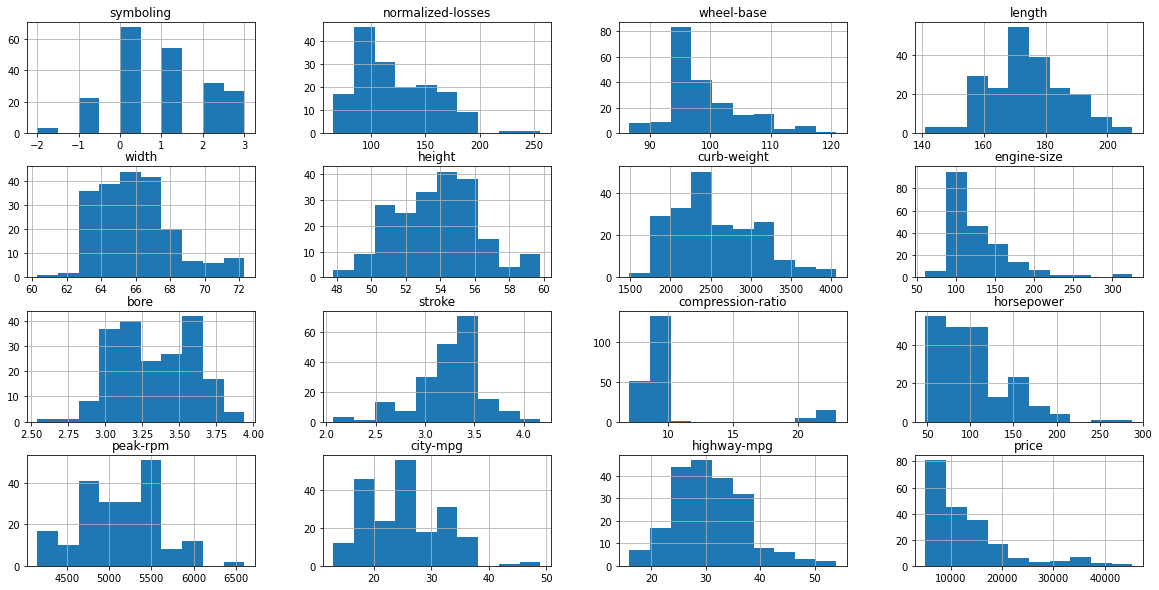

In [ ]:
df.hist(figsize= (20,10), bins= 10)
plt.show()

Imputation using kkn with strategy mean for the numeric values and most frequent strategy for categorical.

As it is asked to only retain data and not use any mean or median imputation, so using SimpleImpute and KNNimpute methods would be the no 1 choice here. 

In [ ]:
num_cols = df.select_dtypes(include = ['float']).columns
category_cols = df['num-of-doors']
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(df[num_cols])
df[num_cols] = impute.transform(df[num_cols])

df[num_cols].isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
price                0
dtype: int64

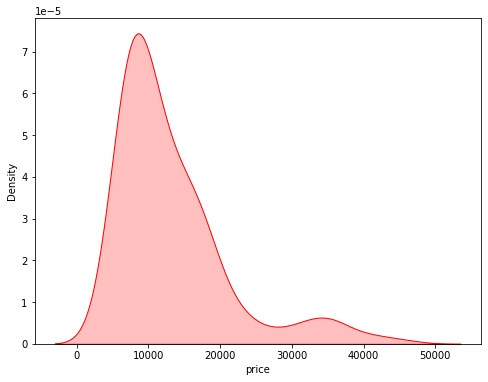

In [ ]:
plt.figure(figsize= (8,6))
ax = sns.kdeplot(df['price'], shade=True, color="r")
plt.show()

(array([81., 45., 39., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

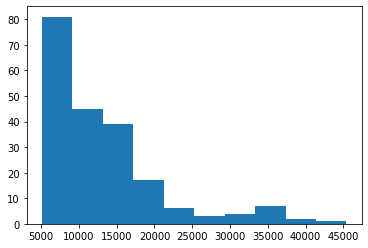

In [ ]:
plt.hist(df['price'])

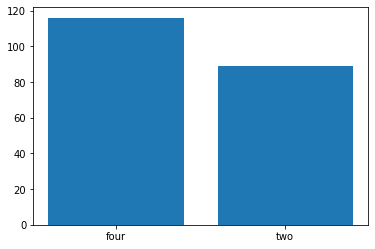

In [ ]:
group_names = ['four', 'two']
plt.bar(group_names, df['num-of-doors'].value_counts())
plt.show()

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

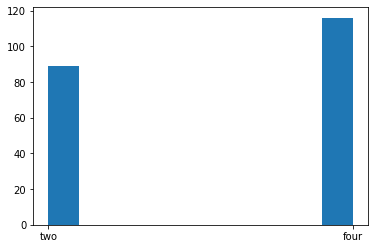

In [ ]:
plt.hist(df['num-of-doors'])

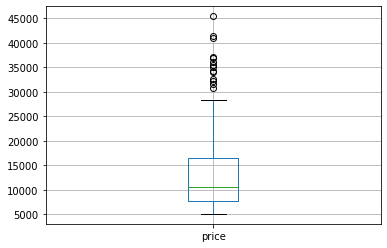

In [ ]:
boxplot = df.boxplot(column=['price'])

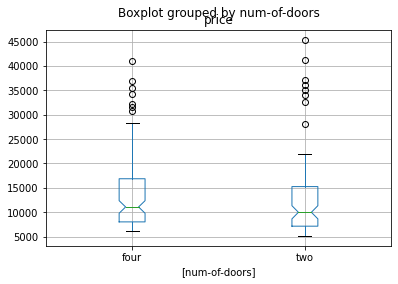

In [ ]:
df.boxplot(column=['price' ], by = ['num-of-doors'],  notch = True)

***As expected four doos cars have higher price average compared to two doors cars ***

In [ ]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
impute.fit(df[category_cols])
df[category_cols] = impute.transform(df[category_cols])

df[category_cols].isnull().sum()
#I think it cannot be used for categorical variables

In [ ]:
#trying to fit using kkn instead of simple imputer and mean/median/mode
df2 = df[['bore','stroke','normalized-losses', 'horsepower','peak-rpm','price']]
imputer = KNNImputer(n_neighbors=6, weights="uniform")
imputer.fit_transform(df2)

array([[ 3.47000000e+00, -1.83491191e+00,  1.22000000e+02,
         1.11000000e+02,  5.00000000e+03,  1.34950000e+04],
       [ 3.47000000e+00, -1.83491191e+00,  1.22000000e+02,
         1.11000000e+02,  5.00000000e+03,  1.65000000e+04],
       [ 2.68000000e+00,  6.84244775e-01,  1.22000000e+02,
         1.54000000e+02,  5.00000000e+03,  1.65000000e+04],
       ...,
       [ 3.58000000e+00, -1.22903878e+00,  9.50000000e+01,
         1.34000000e+02,  5.50000000e+03,  2.14850000e+04],
       [ 3.01000000e+00,  4.61028360e-01,  9.50000000e+01,
         1.06000000e+02,  4.80000000e+03,  2.24700000e+04],
       [ 3.78000000e+00, -3.36173123e-01,  9.50000000e+01,
         1.14000000e+02,  5.40000000e+03,  2.26250000e+04]])

Neither of the Imputers used can be applied to the categorical data, so we will consider the first attempt of imputation simply by using the mode for the column "num-of-doors"

I would use Z scoring Noralization method as feature scaling for both features: engine-size and stroke.

In [ ]:
df['engine-size'] = (df['engine-size']-df['engine-size'].mean())/ df['engine-size'].std()
df['engine-size']

0      0.074267
1      0.074267
2      0.602571
3     -0.430023
4      0.218350
         ...   
200    0.338419
201    0.338419
202    1.106861
203    0.434474
204    0.338419
Name: engine-size, Length: 205, dtype: float64

In [ ]:
df['stroke'] = (df['stroke']-df['stroke'].mean())/ df['stroke'].std()
df['stroke']

0     -1.834912
1     -1.834912
2      0.684245
3      0.461028
4      0.461028
         ...   
200   -0.336173
201   -0.336173
202   -1.229039
203    0.461028
204   -0.336173
Name: stroke, Length: 205, dtype: float64

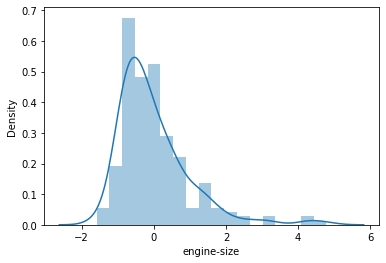

In [ ]:
sns.distplot(df['engine-size'])

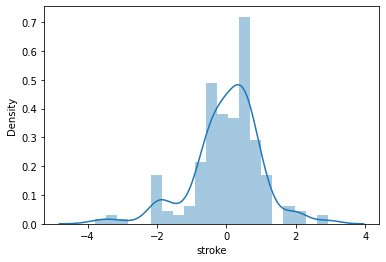

In [ ]:
sns.distplot(df['stroke'])

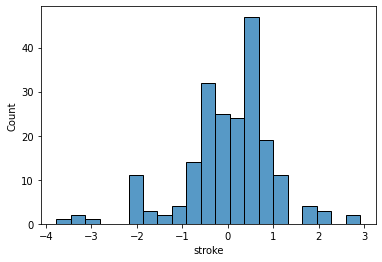

In [ ]:
sns.histplot(data = df
            ,x = 'stroke'
            )



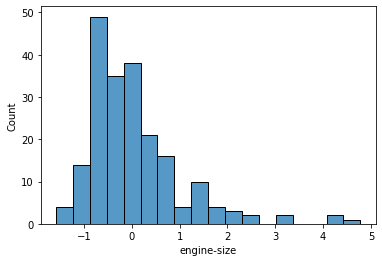

In [ ]:
sns.histplot(data = df
            ,x = 'engine-size'
            
            )

Each of them is skewed against the other, after normalizing both, it seems their relationship is opposite

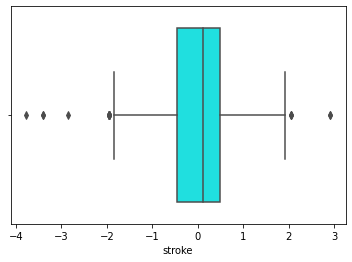

In [ ]:
sns.boxplot(data = df
            ,x = 'stroke'
            
            ,color = 'cyan'
            )

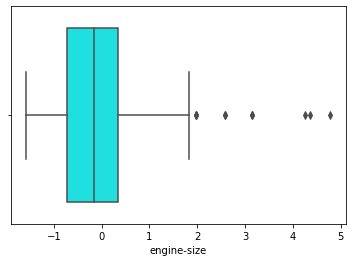

In [ ]:
sns.boxplot(data = df
            ,x = 'engine-size'
            
            ,color = 'cyan'
            )

I think I will try another aproach to see if this skewness are still present or not.



In [ ]:
df['stroke'] = (df['stroke']- df['stroke'].min()) / (df['stroke'].max()-df['stroke'].min())
df['stroke']

0      0.290476
1      0.290476
2      0.666667
3      0.633333
4      0.633333
         ...   
200    0.514286
201    0.514286
202    0.380952
203    0.633333
204    0.514286
Name: stroke, Length: 205, dtype: float64

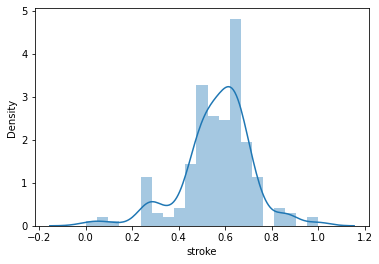

In [ ]:
sns.distplot(df['stroke'])

In [ ]:
df['engine-size'] = (df['engine-size']- df['engine-size'].min()) / (df['engine-size'].max()-df['engine-size'].min())
df['engine-size']

0      0.260377
1      0.260377
2      0.343396
3      0.181132
4      0.283019
         ...   
200    0.301887
201    0.301887
202    0.422642
203    0.316981
204    0.301887
Name: engine-size, Length: 205, dtype: float64

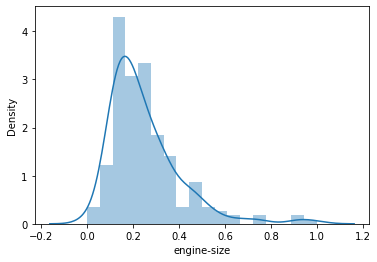

In [ ]:
sns.distplot(df['engine-size'])

correlation between engine-size and stroke:


,engine-size,stroke
engine-size,1.000000,0.203094
stroke,0.203094,1.000000


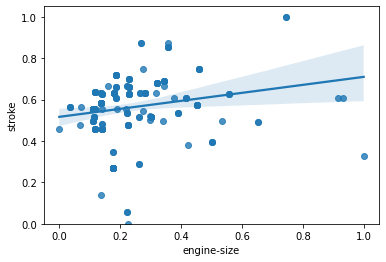

In [ ]:
sns.regplot(x = 'engine-size', y = 'stroke', data = df)
plt.ylim(0,) # y axis starts from zero
print("correlation between engine-size and stroke:")
df[["engine-size", "stroke"]].corr()

No big difference between the two methods of normalization, the skewness is still there.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

(15 Points) Consider the symboling, make, and engine-type variables:
A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal.

According to what is said on UC website: "Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe."
Then symboling is categorical ordinal, make is categorical / nominal, while enginetype is categorical nominal as well

B) For each variable, describe the methodology you would employ for purposes of preparing its data 
values for use within a machine learning algorithm.

The three of them are categorical, if there are any nan values in them the first choice is using the most frequent method to fill the blanks.

C) Using your Python skills, apply your prescribed data preparation methodologies to the three 
variables. Be sure to show a sample of your results within you Jupyter Notebook.

##these three features do not have any null data.

In [ ]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [ ]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [ ]:
df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [ ]:
df['engine-type']

0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object

In [ ]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [ ]:
print(df['make'].unique())
make =[]
make = df['make'].unique()
make

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#counting by make

make_counts = df['make'].value_counts().to_frame()


make_counts.rename(columns= {"make":'Value-counts'}, inplace= True)

make_counts.index.name = 'make'

make_counts

,Value-counts
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11


In [ ]:
make_counts.index

Index(['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugot', 'volvo', 'dodge', 'mercedes-benz', 'bmw', 'audi',
       'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet',
       'alfa-romero', 'renault', 'mercury'],
      dtype='object', name='make')

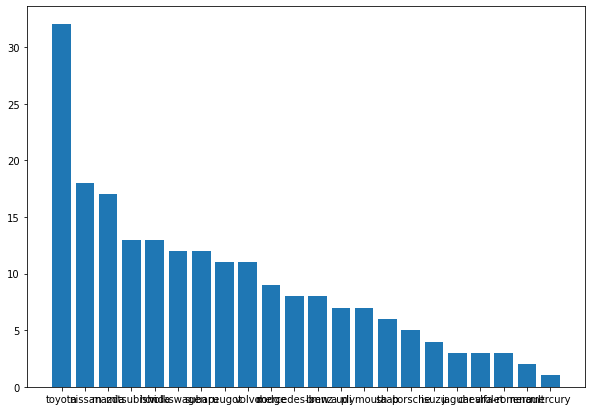

In [ ]:

group_names = ['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugot', 'volvo', 'dodge', 'mercedes-benz', 'bmw', 'audi',
       'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet',
       'alfa-romero', 'renault', 'mercury']
fig = plt.figure(figsize = (10, 7))
plt.bar(group_names, df['make'].value_counts())
plt.show()

In [ ]:
#counting by engine type

engine_counts = df['engine-type'].value_counts().to_frame()


engine_counts.rename(columns= {"engine-type":'Value-counts'}, inplace= True)

engine_counts.index.name = 'engine-type'

engine_counts

,Value-counts
engine-type,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


In [ ]:
engine_counts.index

Index(['ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', 'dohcv'], dtype='object', name='engine-type')

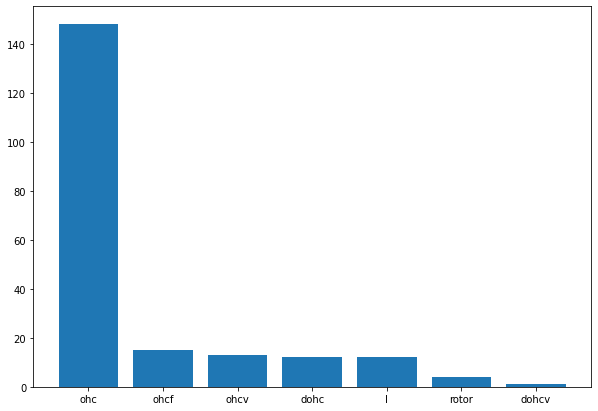

In [ ]:

group_names = ['ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', 'dohcv']
fig = plt.figure(figsize = (10, 7))
plt.bar(group_names, df['engine-type'].value_counts())
plt.show()

In [ ]:
#counting by symboling - which is the risk factor +3 is the highest

symboling_counts = df['symboling'].value_counts().to_frame()


symboling_counts.rename(columns= {"symboling":'Value-counts'}, inplace= True)

symboling_counts.index.name = 'symboling'

symboling_counts

,Value-counts
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


In [ ]:
symboling_counts.index

Int64Index([0, 1, 2, 3, -1, -2], dtype='int64', name='symboling')

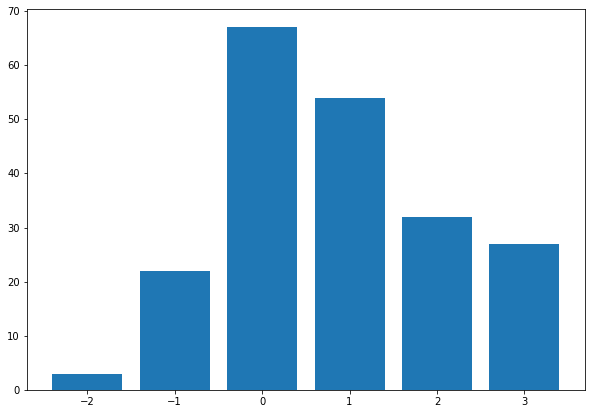

In [ ]:

group_names = [0, 1, 2, 3, -1, -2]
fig = plt.figure(figsize = (10, 7))
plt.bar(group_names, df['symboling'].value_counts())
plt.show()

We can conclude that the number of cars that have zero risk is the highest, with 148 as engine type ohc followed immediately by engine type of ohcf with counts of 15 which is a bhig difference.

While the make is distributed between over 20 cars, all approximately near except toyota having 32 as almost an outlier.

In [ ]:
df[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']] 

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,0.260377,9.0,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,2548,0.260377,9.0,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,2823,0.343396,9.0,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,2337,0.181132,10.0,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,2824,0.283019,8.0,115.0,5500.0,18
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,0.301887,9.5,114.0,5400.0,23
201,109.1,188.8,68.8,55.5,3049,0.301887,8.7,160.0,5300.0,19
202,109.1,188.8,68.9,55.5,3012,0.422642,8.8,134.0,5500.0,18
203,109.1,188.8,68.9,55.5,3217,0.316981,23.0,106.0,4800.0,26


In [ ]:
# assign the explanatory variables to a Python object
X = df[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']] 

# assign the response variable to a Python object
y = df.price

# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.65634469 0.34265209]


In [ ]:
0.65634469 + 0.34265209

0.9989967799999999

The application of PCA to the data set has yielded two principal components, the first of which explains 65.63% of the variance in the X group data. The second principal component explains an additional 34.26% of the variance in the data. Therefore, the two principal components explain a total of more than 99.89% of the variance in the data set

In [ ]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)

[6610.6093222  4776.41658936]


We need [6610.6093222  4776.41658936] of data to reach 99.89% variance.

References:

1. obeabi. (2020, December 10). Automobile_Data_Set/Auto_EDA.ipynb at main · obeabi/automobile_data_set. GitHub. Retrieved November 7, 2022, from https://github.com/obeabi/Automobile_Data_Set/blob/main/Auto_EDA.ipynb 

2. Hansen, C. (2019, December 19). Principal component analysis (PCA) and Singular Value Decomposition (SVD). Machine Learning From Scratch. Retrieved November 7, 2022, from https://mlfromscratch.com/principal-component-analysis-pca-svd/#/ 

3. The lecture Notes - Katz University.
